<a href="https://colab.research.google.com/github/shareefat/Deep_learning_Projects/blob/main/Bank_turn_over.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [58]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


droping unwanted rows

In [59]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
!pip install category_encoders

In [62]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [63]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [64]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df1=pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [66]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


#Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [68]:
col_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])

In [69]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,False,False,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,False,False,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,False,False,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,True,False


#Train test

In [77]:
x = df1.drop('Exited', axis=1)
y = df1['Exited']

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [78]:
x.shape


(10000, 11)

#model developing

In [73]:
from tensorflow import keras

In [82]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,),activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7902 - loss: 0.5177
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8033 - loss: 0.4607
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8159 - loss: 0.4404
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.4309
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8230 - loss: 0.4077
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8297 - loss: 0.4003
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8446 - loss: 0.3723
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8502 - loss: 0.3667
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3541
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.3494
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8498 - loss: 0.3589
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [85]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.3275


[0.3363812267780304, 0.8544999957084656]

In [87]:
y_pred=model.predict(x_test)
y_pred[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.3758433 ],
       [0.3399747 ],
       [0.1350777 ],
       [0.03616439],
       [0.06810503],
       [0.9865633 ],
       [0.03771089],
       [0.11877766],
       [0.07966826],
       [0.89518875]], dtype=float32)

In [89]:
y_test[:10]

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
8225,1
5506,0
6451,0
2670,1
3497,1


In [90]:
y_predictions=[]
for i in y_pred:
  if i>0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)

In [91]:
y_predictions[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [92]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predictions)
cm

array([[1503,   92],
       [ 199,  206]])

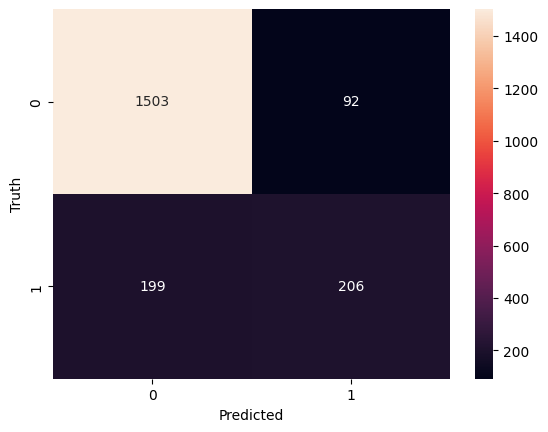

In [95]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#Analysis

In [96]:
precision=206/(206+199)
precision*100

50.864197530864196

In [97]:
recall=206/(206+92)
recall*100

69.12751677852349

In [99]:
f1_score=2*precision*recall/(precision+recall)
f1_score*100

58.60597439544808